In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as plt
import tensorflow.keras as keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cration of time windows
def time_window(series, step_length, target_column):
  # X for attributes Y for target
  X_series = X_test = []
  Y_series = Y_test = []
  last = len(series) - sequence_length
  for i in range(last):
    X_series.append(series[i : i + sequence_length])
    Y_series.append(series[i + sequence_length, target_column])

  #X_test = np.array(X_test.append(series[last : last + sequence_length]))
  #Y_test = np.array(Y_test.append(series[last : last + sequence_length, target_column]))
  #X_test = np.delete(X_test, target_column, 2) # Drop target from training

  X_series = np.array(X_series)
  Y_series = np.array(Y_series)
  X_series = np.delete(X_series, target_column, 2) # Drop target from training
  return X_series, Y_series #, X_test, Y_test

In [5]:
#train set generado por la función data()
train = pd.read_feather('/content/drive/MyDrive/Escuela/data/training_30m_80.feather')
train = train[['Open_Norm', 'High_Norm', 'Low_Norm', 'Close_Norm', 'Close_Rate', 'Volume_Log', 'Volume_Qty', 'Taker_Prop', 'Volume_Trade_Norm']]
sequence_length = 30
train_vals = train.values
#X_train = []
#Y_train = []
#for i in range(len(train_vals) - sequence_length):
#    X_train.append(train_vals[i : i + sequence_length])
#    Y_train.append(train_vals[i + sequence_length, 3])
#
#X_train = np.array(X_train)
#Y_train = np.array(Y_train)
#print(X_train.shape)
#print(np.delete(X_train, 3, 2).shape)

X_train, Y_train = time_window(train_vals, sequence_length, 3)
X_train.shape , Y_train.shape

((79902, 30, 8), (79902,))

In [6]:
#train['Close_Norm'][10:20]
train.shape

(79932, 9)

In [7]:
#train set generado por la función data()
validation = pd.read_feather('/content/drive/MyDrive/Escuela/data/validation_30m_20.feather')
validation = validation[['Open_Norm', 'High_Norm', 'Low_Norm', 'Close_Norm', 'Close_Rate', 'Volume_Log', 'Volume_Qty', 'Taker_Prop', 'Volume_Trade_Norm']]
#validaton.head()
#sequence_length = 30
validation_vals = validation.values
#X_val = []
#Y_val = []
#for i in range(len(validation_vals) - sequence_length):
#    X_val.append(validation_vals[i : i + sequence_length])
#    Y_val.append(validation_vals[i + sequence_length, 3])
#
#X_val = np.array(X_val)
#Y_val = np.array(Y_val)
#print(X_val.shape)
#print(Y_val.shape)
#print(validation.shape)
X_val, Y_val = time_window(validation_vals, sequence_length, 3)
X_val.shape, Y_val.shape

((19953, 30, 8), (19953,))

In [ ]:
'''
# Separación input / output (training set) no
X_train = train.drop(['Close_Norm'], axis=1)
Y_train = train[['Close_Norm']]
X_train.shape
'''

(79932, 8)

In [ ]:
'''
# Separación input / output (validation set) no
X_validation = validation.drop(['Close_Norm'], axis=1)
Y_validation = validation[['Close_Norm']]
Y_validation
'''

,Close_Norm
79932,0.395453
79933,0.393314
79934,0.394558
79935,0.388900
79936,0.390239
...,...
99910,1.048934
99911,1.044062
99912,1.055422
99913,1.052053


In [7]:
# Modelo prueba v1
model = keras.Sequential()
model.add(keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))

# Compilación

# Optimizador (propuesta): SGD
#optimizer = keras.optimizers.SGD(learning_rate=1e-6, momentum=0.9)
model.compile(optimizer='adam', loss=keras.losses.Huber(), metrics=['mae'])
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/10
2497/2497 [==============================] - 23s 6ms/step - loss: 8.3795e-04 - mae: 0.0116 - val_loss: 3.2974e-05 - val_mae: 0.0048
Epoch 2/10
2497/2497 [==============================] - 19s 8ms/step - loss: 3.7438e-05 - mae: 0.0055 - val_loss: 2.8319e-05 - val_mae: 0.0043
Epoch 3/10
2497/2497 [==============================] - 18s 7ms/step - loss: 3.4238e-05 - mae: 0.0054 - val_loss: 2.5282e-05 - val_mae: 0.0040
Epoch 4/10
2497/2497 [==============================] - 18s 7ms/step - loss: 2.9747e-05 - mae: 0.0049 - val_loss: 2.5057e-05 - val_mae: 0.0040
Epoch 5/10
2497/2497 [==============================] - 16s 6ms/step - loss: 2.8045e-05 - mae: 0.0047 - val_loss: 2.6418e-05 - val_mae: 0.0048
Epoch 6/10
2497/2497 [==============================] - 18s 7ms/step - loss: 2.5732e-05 - mae: 0.0045 - val_loss: 2.7370e-05 - val_mae: 0.0048
Epoch 7/10
2497/2497 [==============================] - 23s 9ms/step - loss: 2.5291e-05 - mae: 0.0045 - val_loss: 2.6660e-05 - val_mae: 0.0048

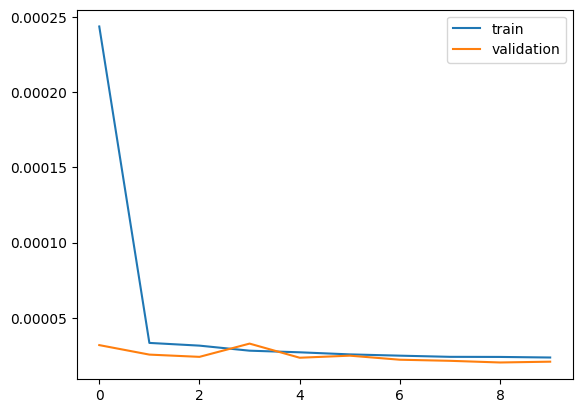

In [ ]:
plt.pyplot.plot(history.history['loss'], label='train')
plt.pyplot.plot(history.history['val_loss'], label='validation')
plt.pyplot.legend()
plt.pyplot.show()

## Optimización de hiperparámetros

In [8]:
pip install scikeras

In [9]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [10]:
seed = 7
tf.random.set_seed(seed)

In [11]:
# Creamos los conjuntos para ajustar los hiperparametros
n = int(X_val.shape[0] * 0.1)
number_of_rows = validation_vals.shape[0]
random_indices = np.random.choice(number_of_rows, size=n, replace=False)
validation_vals_hiper = validation_vals[random_indices, :]
X_val_hiper, Y_val_hiper = time_window(validation_vals_hiper, sequence_length, 3)
X_val_hiper.shape, Y_val_hiper.shape

((1965, 30, 8), (1965,))

#  batch size y training epochs

In [21]:
# Function para crear el modelo, para KerasRegressor
def create_model():
 # Crea el modelo
  model = keras.Sequential()
  model.add(keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dense(1))
  # Compila el modelo
  model.compile(optimizer='adam', loss=keras.losses.Huber(), metrics=['mae'])
  return model


In [22]:
# creación del modelo para optimizar
model = KerasRegressor(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20]
epochs = [10, 50]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, error_score='raise')
# buscamos los mejores
grid_result = grid.fit(X_val_hiper, Y_val_hiper)
# resultados
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.024404 using {'batch_size': 20, 'epochs': 10}
-0.044197 (0.028164) with: {'batch_size': 10, 'epochs': 10}
-0.055385 (0.014970) with: {'batch_size': 10, 'epochs': 50}
-0.024404 (0.009132) with: {'batch_size': 20, 'epochs': 10}
-0.047071 (0.024280) with: {'batch_size': 20, 'epochs': 50}


# Algoritmo de optimización

In [13]:
# funcion sin compile
def create_model_algor():
 # Crea el modelo
  model = keras.Sequential()
  model.add(keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dense(1))
  return model


In [24]:
model = KerasRegressor(model=create_model_algor, loss="binary_crossentropy", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters : https://deepdatascience.wordpress.com/2016/11/18/which-lstm-optimizer-to-use/
optimizer = ['SGD', 'RMSprop', 'Adadelta', 'Adam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# buscar el mejor
grid_result = grid.fit(X_val_hiper, Y_val_hiper)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -5.259893 using {'optimizer': 'Adam'}
-5.780825 (8.116922) with: {'optimizer': 'SGD'}
-11.817140 (8.360487) with: {'optimizer': 'RMSprop'}
-21.188253 (6.563254) with: {'optimizer': 'Adadelta'}
-5.259893 (7.329426) with: {'optimizer': 'Adam'}


# Learning Rate y Momentum

In [14]:
# create model
model = KerasRegressor(model=create_model_algor, loss="binary_crossentropy", optimizer="Adam", epochs=100, batch_size=10, verbose=0)
# define the grid search parameters, 0.1, 0.2, 0.3.
learn_rate = [0.001, 0.01]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(optimizer__learning_rate=learn_rate)#, optimizer__momentum=momentum
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val_hiper, Y_val_hiper)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -7.303355 using {'optimizer__learning_rate': 0.001}
-7.303355 (10.234339) with: {'optimizer__learning_rate': 0.001}
-225.050427 (305.499377) with: {'optimizer__learning_rate': 0.01}


# Network Weight Initialization

In [18]:
# Function para crear el modelo, para KerasRegressor
def create_model_weight(init_mode='uniform'):
 # Crea el modelo
  model = keras.Sequential()
  model.add(keras.layers.LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_initializer=init_mode))
  model.add(keras.layers.Dense(1))
  # Compila el modelo
  model.compile(optimizer='adam', loss=keras.losses.Huber(), metrics=['mae'])
  return model


In [19]:
# create model
model = KerasRegressor(model=create_model_weight, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters 'uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'
init_mode = ['uniform', 'normal']
param_grid = dict(model__init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val_hiper, Y_val_hiper)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best: -0.043960 using {'model__init_mode': 'uniform'}
-0.043960 (0.028148) with: {'model__init_mode': 'uniform'}
-0.071044 (0.058050) with: {'model__init_mode': 'normal'}


# Number of Neurons in the Hidden Layer

In [20]:
# Function para crear el modelo, para KerasRegressor
def create_model_weight(neurons):
 # Crea el modelo
  model = keras.Sequential()
  model.add(keras.layers.LSTM(neurons, input_shape=(X_train.shape[1], X_train.shape[2])))
  model.add(keras.layers.Dense(1))
  # Compila el modelo
  model.compile(optimizer='adam', loss=keras.losses.Huber(), metrics=['mae'])
  return model


In [22]:
# create model
model = KerasRegressor(model=create_model_weight, epochs=100, batch_size=10, verbose=0)
# define the grid search parameters , 10, 15, 20, 25, 30
neurons = [25, 50]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_val_hiper, Y_val_hiper)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.051409 using {'model__neurons': 25}
-0.051409 (0.019908) with: {'model__neurons': 25}
-0.096762 (0.051887) with: {'model__neurons': 50}
